# MMagic Inference Tutorial

Welcome to MMagic! This is the official tutorial for using MMagic inference api to predict your own image or video.

In this tutorial, you will learn how to

[1. Install MMagic](#1-install-mmagic)

[2. Check inference supported tasks and models](#2-check-inference-supported-tasks-and-models)

[3. Perform inference using MMagic
 inference API](#3-perform-inference-with-mmagic-api)

&emsp; [3.1 Prepare some images or videos for inference](#31-prepare-some-images-or-videos-for-inference)

&emsp; [3.2 Perform inference with two lines of python code](#32-perform-inference-with-two-lines-of-python-code)

&emsp; [3.3 Infer with different settings of a specific model](#33-infer-with-different-settings-of-a-specific-model)

&emsp; [3.4 Infer with extra parameters](#34-inference-with-extra-parameters)

[4. Perform inference with models of different tasks including](#4-perform-inference-with-models-of-different-tasks):

&emsp; [4.1 Inference of conditional GANs models](#41-inference-of-conditional-gan-models)

&emsp; [4.2 Inference of inpanting models](#42-inference-of-inpainting-models)

&emsp; [4.3 Inference of matting models](#43-inference-of-matting-models)

&emsp; [4.4 Inference of super resolution models](#44-inference-of-image-super-resolution-models)

&emsp; [4.5 Inference of image2image models](#45-inference-of-image-translation-models)

&emsp; [4.6 Inference of unconditional GANs models](#46-inference-of-unconditional-gan-models)

&emsp; [4.7 Inference of video interpolation models](#47-inference-of-video-interpolation-models)

&emsp; [4.8 Inference of video super resolution models](#48-inference-of-video-restoration-models)

&emsp; [4.9 Inference of text-to-image models](#49-inference-of-text-to-image-models)

Let's start!

## 1. Install MMagic

In [1]:
# Check PyTorch version
!pip3 list | grep torch

open-clip-torch          2.5.0
pytorch-triton           2.1.0+7d1a95b046
torch                    2.0.1
torchaudio               2.0.1+cu117
torchvision              0.15.2


In [2]:
# Install mmcv dependency via openmim
!pip3 install openmim
!mim install 'mmcv>=2.0.0'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html


In [3]:
# Install mmagic from source
%cd ..
!pip3 install -e .
%cd demo

/data/sq/my_project/openmmlab/mmagic
Obtaining file:///data/sq/my_project/openmmlab/mmagic
  Attempting uninstall: mmagic
    Found existing installation: mmagic 1.0.2.dev0
    Uninstalling mmagic-1.0.2.dev0:
      Successfully uninstalled mmagic-1.0.2.dev0
  Running setup.py develop for mmagic
/data/sq/my_project/openmmlab/mmagic/demo


In [4]:
# Check MMagic installation
import mmagic
print(mmagic.__version__)

1.0.2dev0


## 2. Check inference supported tasks and models

There are multiple task types in MMagic: Matting, Inpainting, Video Super-Resolution, Image Super-Resolution, Image2Image, Unconditional GANs, Conditional GANs, Video Interpolation. 

We provide some models for each task. All available models and tasks could be printed out like this.

In [5]:
from mmagic.apis import MMagicInferencer

# print all supported models for inference.
inference_supported_models = MMagicInferencer.get_inference_supported_models()
print('all supported models:')
print(inference_supported_models)

# print all supported tasks for inference.
supported_tasks = MMagicInferencer.get_inference_supported_tasks()
print('all supported tasks:')
print(supported_tasks)

# print all supported models for one task, take image translation for example.
task_supported_models = MMagicInferencer.get_task_supported_models('Image2Image')
print('translation models:')
print(task_supported_models)

all supported models:
['inst_colorization', 'biggan', 'sngan_proj', 'sagan', 'dcgan', 'wgan-gp', 'lsgan', 'ggan', 'pggan', 'styleganv1', 'styleganv2', 'styleganv3', 'dim', 'indexnet', 'gca', 'aot_gan', 'deepfillv1', 'deepfillv2', 'global_local', 'partial_conv', 'pix2pix', 'cyclegan', 'srcnn', 'srgan_resnet', 'edsr', 'esrgan', 'rdn', 'dic', 'ttsr', 'glean', 'real_esrgan', 'flavr', 'cain', 'edvr', 'tdan', 'basicvsr', 'iconvsr', 'basicvsr_pp', 'real_basicvsr', 'nafnet', 'swinir', 'restormer', 'controlnet', 'disco_diffusion', 'stable_diffusion', 'eg3d', 'controlnet_animation']
all supported tasks:
['Unconditional GANs', 'Conditional GANs', 'Text2Image, Image2Image', 'Denoising, Deblurring, Deraining', 'Inpainting', 'Video Interpolation', '3D-aware Generation', 'controlnet_animation', 'Text2Image', 'Colorization', 'Image Super-Resolution', 'Image2Image', 'Matting', 'Image Restoration', 'Image Super-Resolution, Image denoising, JPEG compression artifact reduction', 'Video Super-Resolution']


## 3. Perform inference with MMagic API

Next we describe how to perform inference with python code snippets.

(We also provide command line interface for you to do inference by running mmagic_inference_demo.py. The usage of this interface could be found in [README.md](./README.md) and more guidance could be found in the [documentation](https://mmagic.readthedocs.io/en/latest/user_guides/3_inference.html#).)


### 3.1 Prepare some images or videos for inference

Before we start to perform inference with a pretrained model, some input images or videos should be prepared. 

Take image translation for example. We need a input image to be translated.

Put your image to some directory and make a directory to save processed image.

In [6]:
# make a dir for input image and output image
!mkdir -p ./../resources/input/translation
!mkdir -p ./../resources/output/translation

We also have prepared some images and videos for you. You can download by running [download_inference_resouces.py](./download_inference_resources.py).

This script allows you to see what resources are available and makes download easier.

In [7]:
# see all resources
!python download_inference_resources.py --print-all
# see all task types
!python download_inference_resources.py --print-task-type
# see resources of one specific task
!python download_inference_resources.py --print-task 'Inpainting'
# download all resouces to default dir '../resources'
!python download_inference_resources.py
# download resouces of one task
!python download_inference_resources.py --task 'Inpainting'
# download to the directory you want
!python download_inference_resources.py --root-dir '../resources'

all inference resources:
Matting
https://download.openmmlab.com/mmediting/resources/input/matting/GT05.jpg
https://download.openmmlab.com/mmediting/resources/input/matting/GT05_trimap.jpg
https://download.openmmlab.com/mmediting/resources/input/matting/readme.md
Inpainting
https://download.openmmlab.com/mmediting/resources/input/inpainting/bbox_mask.png
https://download.openmmlab.com/mmediting/resources/input/inpainting/celeba_test.png
https://download.openmmlab.com/mmediting/resources/input/inpainting/readme.md
Image Super-Resolution
https://download.openmmlab.com/mmediting/resources/input/restoration/000001.png
https://download.openmmlab.com/mmediting/resources/input/restoration/0901x2.png
https://download.openmmlab.com/mmediting/resources/input/restoration/readme.md
Image2Image Translation
https://download.openmmlab.com/mmediting/resources/input/translation/gt_mask_0.png
https://download.openmmlab.com/mmediting/resources/input/translation/readme.md
Video Interpolation
https://downlo

### 3.2 Perform inference with two lines of python code. 

There are two steps:

First, create a MMagicInferencer instance by a pretrained model name.

Second, infer your own image with this MMagicInferencer instance. The translated image will be saved to result_out_dir.

In [8]:
from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance
editor = MMagicInferencer('pix2pix')
# Infer a image. Input image path and output image path is needed.
results = editor.infer(img='../resources/input/translation/gt_mask_0.png', result_out_dir='../resources/output/translation/tutorial_translation_pix2pix_res.jpg')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


Downloading: "https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth" to /home/sq/.cache/torch/hub/checkpoints/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


07/11 17:00:44 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.
07/11 17:00:44 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


You could see your result image by plotting it out.

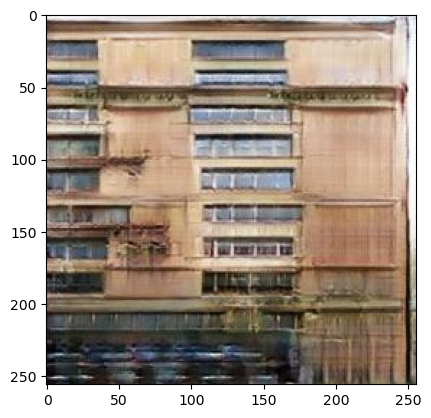

In [9]:
# plot the result image
import mmcv
import matplotlib.pyplot as plt 
img = mmcv.imread('../resources/output/translation/tutorial_translation_pix2pix_res.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.3 Infer with different settings of a specific model

There are some different configs and checkpoints for one model.

Take conditional GAN model 'biggan' as an example. We have pretrained model for Cifar and Imagenet, and all pretrained models of 'biggan' are listed in its [metafile.yaml](../configs/biggan/metafile.yml)

You could configure different settings by passing 'model_setting' to 'MMagicInferencer'. Every model's default setting is 0.

/data/sq/miniconda3/lib/python3.9/site-packages/mmcv/cnn/bricks/conv_module.py:207: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


Downloading: "https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth" to /home/sq/.cache/torch/hub/checkpoints/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


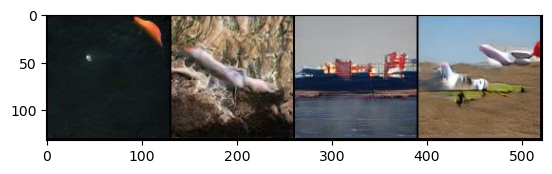

In [10]:
import mmcv
import matplotlib.pyplot as plt
from mmagic.apis import MMagicInferencer

result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res_setting1.jpg'
# configure setting to 1
editor = MMagicInferencer('biggan', model_setting=1) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.4 Infer with extra parameters

Some models may have extra parameters that could be configured to perform inference.

Take 'biggan' for example. You could configure 'num_batches' in a dict and pass it to 'MMagicInferencer'.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


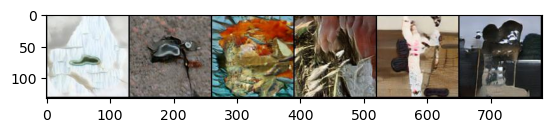

In [11]:
import mmcv
import matplotlib.pyplot as plt
from mmagic.apis import MMagicInferencer

result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res_sample6.jpg'
# use a dict to pass the parameters, num_batches means images output num for one inference
editor = MMagicInferencer('biggan', model_setting=1, extra_parameters={'num_batches':6}) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image and we could see 6 images in a inference batch
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

To know what extra parameters that a model have, do like this.

In [12]:
from mmagic.apis import MMagicInferencer

editor = MMagicInferencer('biggan', model_setting=1) 
editor.print_extra_parameters()
# 'num_batches' and 'sample_model' are extra parameters in 'biggan' model.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth
['num_batches', 'sample_model']


## 4. Perform inference with models of different tasks

### 4.1 Inference of conditional GAN models

Conditional GAN models take a label as input and output a image. We take 'biggan' as an example.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/biggan/biggan_imagenet1k_128x128_b32x8_best_is_iter_1328000_20211111_122911-28c688bc.pth


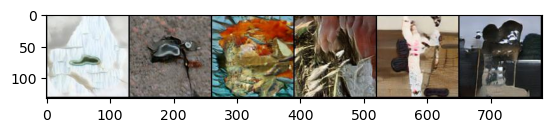

In [13]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance and infer
result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res.jpg'
editor = MMagicInferencer('biggan', model_setting=1)
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.2 Inference of inpainting models

Inpaiting models take a masked image and mask pair as input, and output a inpainted image. We take 'global_local' as an example.

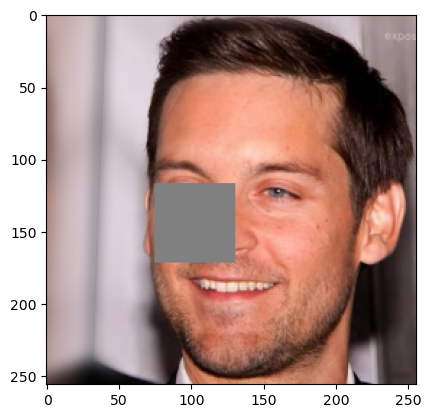

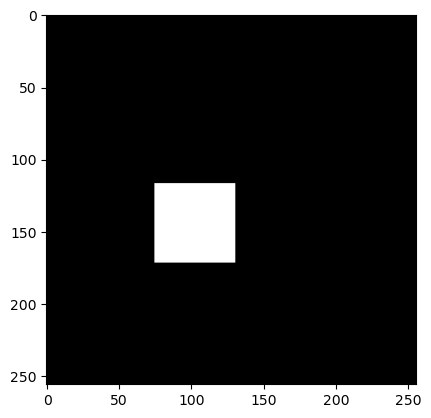

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth


Downloading: "https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth" to /home/sq/.cache/torch/hub/checkpoints/gl_256x256_8x12_celeba_20200619-5af0493f.pth


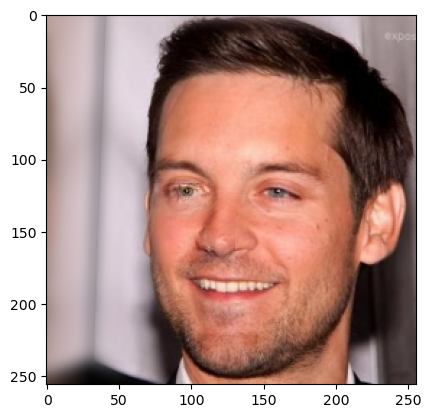

In [14]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

img = '../resources/input/inpainting/celeba_test.png'
mask = '../resources/input/inpainting/bbox_mask.png'

# show input image and mask
input_img = mmcv.imread(img)
plt.imshow(mmcv.bgr2rgb(input_img))
plt.show()
input_mask = mmcv.imread(mask)
plt.imshow(mmcv.bgr2rgb(input_mask))
plt.show()

# Create a MMagicInferencer instance and infer
result_out_dir = '../resources/output/inpainting/tutorial_inpainting_global_local_res.jpg'
editor = MMagicInferencer('global_local', model_setting=1)
results = editor.infer(img=img, mask=mask, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.3 Inference of matting models

Inpaiting models take a image and trimap pair as input, and output a alpha image. We take 'gca' as an example.

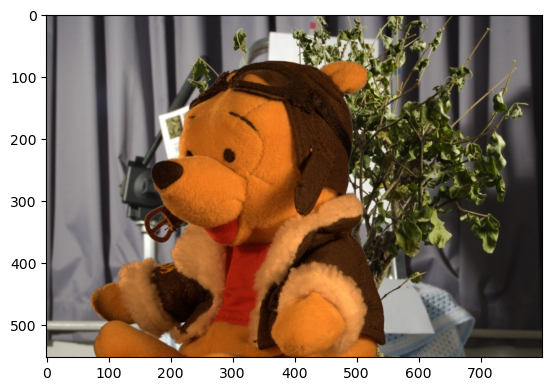

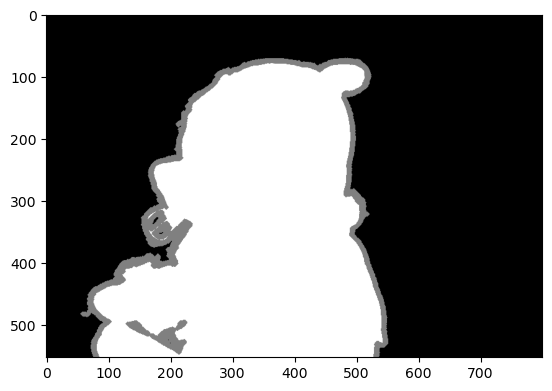

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/mattors/gca/baseline_r34_4x10_200k_comp1k_SAD-34.61_20220620-96f85d56.pth


Downloading: "https://download.openmmlab.com/mmediting/mattors/gca/baseline_r34_4x10_200k_comp1k_SAD-34.61_20220620-96f85d56.pth" to /home/sq/.cache/torch/hub/checkpoints/baseline_r34_4x10_200k_comp1k_SAD-34.61_20220620-96f85d56.pth


The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



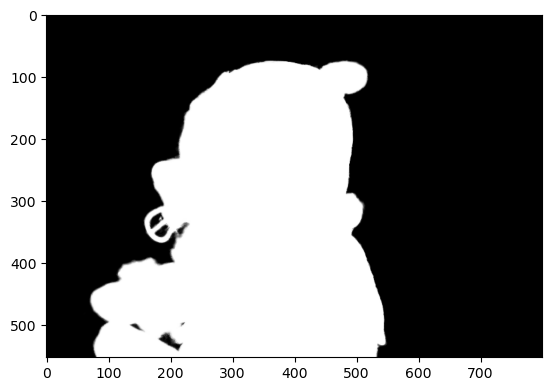

In [15]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

img = '../resources/input/matting/GT05.jpg'
trimap = '../resources/input/matting/GT05_trimap.jpg'

# show input image and mask
input_img = mmcv.imread(img)
plt.imshow(mmcv.bgr2rgb(input_img))
plt.show()
input_trimap = mmcv.imread(trimap)
plt.imshow(mmcv.bgr2rgb(input_trimap))
plt.show()

# Create a MMagicInferencer instance and infer
result_out_dir = '../resources/output/matting/tutorial_matting_gca_res.png'
editor = MMagicInferencer('gca')
results = editor.infer(img=img, trimap=trimap, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.4 Inference of image super resolution models

Image super resolution models take a image as input, and output a high resolution image. We take 'esrgan' as an example.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_psnr_x4c64b23g32_1x16_1000k_div2k_20200420-bf5c993c.pth


Downloading: "https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_psnr_x4c64b23g32_1x16_1000k_div2k_20200420-bf5c993c.pth" to /home/sq/.cache/torch/hub/checkpoints/esrgan_psnr_x4c64b23g32_1x16_1000k_div2k_20200420-bf5c993c.pth


07/11 17:02:11 - mmengine - WARNING - Cannot find key 'gt_img' in data sample.


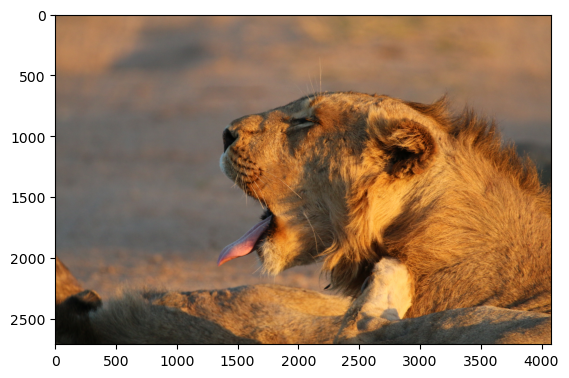

In [16]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance and infer
img = '../resources/input/restoration/0901x2.png'
result_out_dir = '../resources/output/restoration/tutorial_restoration_esrgan_res.png'
editor = MMagicInferencer('esrgan')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.5 Inference of image translation models

Image translation models take a image as input, and output a translated image. We take 'pix2pix' as an example.

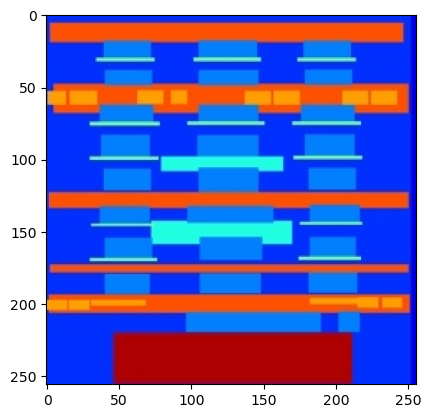

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


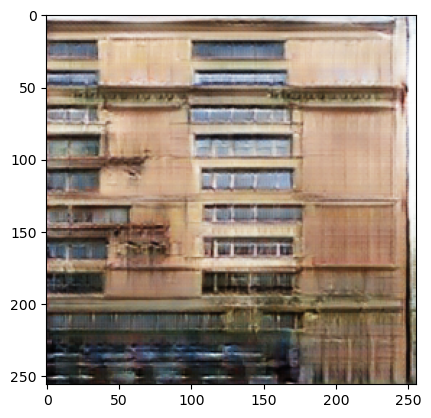

In [17]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

img = '../resources/input/translation/gt_mask_0.png'

# show input image and mask
input_img = mmcv.imread(img)
plt.imshow(mmcv.bgr2rgb(input_img))
plt.show()

# Create a MMagicInferencer instance and infer
result_out_dir = '../resources/output/translation/tutorial_translation_pix2pix_res.png'
editor = MMagicInferencer('pix2pix')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.6 Inference of unconditional GAN models

Unconditional GAN models do not need input, and output a image. We take 'styleganv1' as an example.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/stylegan2/stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: gen_auxiliary_losses.0.mean_path_length

missing keys in source state_dict: mean_path_length

Switch to evaluation style mode: single
Switch to evaluation style mode: single


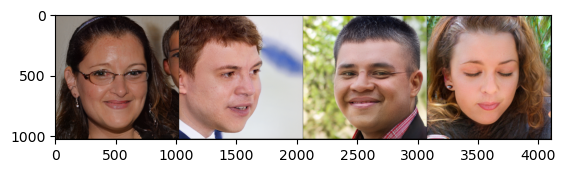

In [23]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance and infer
result_out_dir = '../resources/output/unconditional/tutorial_unconditional_styleganv1_res.png'
editor = MMagicInferencer('styleganv2')
results = editor.infer(result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 4.7 Inference of video interpolation models

Video interpolation models take a video as input, and output a interpolated video. We take 'flavr' as an example.

In [19]:
import os
from mmagic.apis import MMagicInferencer
from mmengine import mkdir_or_exist

# Create a MMagicInferencer instance and infer
video = '../resources/input/video_interpolation/b-3LLDhc4EU_000000_000010.mp4'
result_out_dir = '../resources/output/video_interpolation/tutorial_video_interpolation_flavr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMagicInferencer('flavr')
results = editor.infer(video=video, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/video_interpolators/flavr/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth


Downloading: "https://download.openmmlab.com/mmediting/video_interpolators/flavr/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth" to /home/sq/.cache/torch/hub/checkpoints/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 22/22, 3.1 task/s, elapsed: 7s, ETA:     0s07/11 17:02:38 - mmengine - INFO - Output video is save at ../resources/output/video_interpolation/tutorial_video_interpolation_flavr_res.mp4.
07/11 17:02:38 - mmengine - INFO - Visualization is implemented in forward process.
07/11 17:02:38 - mmengine - INFO - Postprocess is implemented in forward process.


Please check the result video in the output directory.

### 4.8 Inference of video restoration models

Video restoration models take a video as input, and output a restorated video. We take 'basicvsr' as an example..

In [20]:
import os
from mmagic.apis import MMagicInferencer
from mmengine import mkdir_or_exist

# Create a MMagicInferencer instance and infer
video = '../resources/input/video_restoration/QUuC4vJs_000084_000094_400x320.mp4'
result_out_dir = '../resources/output/video_restoration/tutorial_video_restoration_edvr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMagicInferencer('edvr', extra_parameters={'window_size':5})
results = editor.infer(video=video, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/restorers/edvr/edvrm_wotsa_x4_8x4_600k_reds_20200522-0570e567.pth


Downloading: "https://download.openmmlab.com/mmediting/restorers/edvr/edvrm_wotsa_x4_8x4_600k_reds_20200522-0570e567.pth" to /home/sq/.cache/torch/hub/checkpoints/edvrm_wotsa_x4_8x4_600k_reds_20200522-0570e567.pth


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 300/300, 23.6 task/s, elapsed: 13s, ETA:     0s07/11 17:03:46 - mmengine - INFO - Output video is save at ../resources/output/video_restoration/tutorial_video_restoration_edvr_res.mp4.
07/11 17:03:46 - mmengine - INFO - Postprocess is implemented in visualize process.


Please check the result video in the output directory.

### 4.9 Inference of text-to-image models

Text-to-image models take text as input, and output a image. We take 'stable_diffusion' as an example.

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


07/11 17:03:52 - mmengine - INFO - Set UNet dtype to 'torch.float32'.
07/11 17:03:54 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/data/sq/my_project/openmmlab/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


07/11 17:03:55 - mmengine - INFO - Set UNet dtype to 'torch.float32' in the eval mode.


/data/sq/my_project/openmmlab/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)


  0%|          | 0/50 [00:00<?, ?it/s]

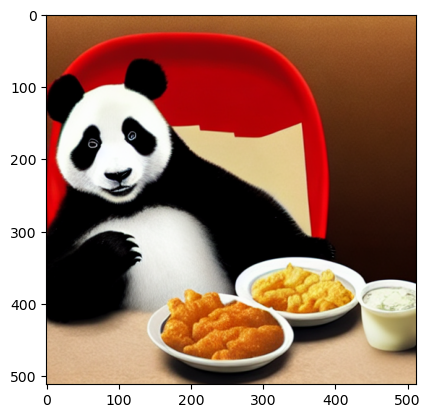

In [21]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance and infer
editor = MMagicInferencer(model_name='stable_diffusion')
text_prompts = 'A panda is having dinner at KFC'
result_out_dir = '../resources/output/text2image/tutorial_text2image_sd_res.png'
editor.infer(text=text_prompts, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()